# Introduction to Implementing PCA

The motivation of Principal Component Analysis (PCA) is to find a new set of features that are ordered by the amount of variation (and therefore, information) they contain. We can then select a subset of these PCA features. This leaves us with lower-dimensional data that still retains most of the information contained in the larger dataset.

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
# Load the data
df = pd.read_csv("databank/Dry_Bean_Dataset.csv")

# Remove na and null values 

df.dropna().head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [168]:
# Extract the numerical columns
data_matrix = df.drop(columns=["Class"])

In [215]:
# Extract the classes
classes = df["Class"]
classes = pd.DataFrame(classes, columns=["Class"])
classes.to_csv("databank/classes.csv", index=False)

### Implementing PCA in NumPy I

In this exercise, we will perform PCA using the NumPy method **`np.linalg.eig`**, which performs **eigendecomposition** and outputs the **eigenvalues and eigenvectors**.

The eigenvalues are related to the relative variation described by each principal component. The eigenvectors are also known as the principal axes. They tell us how to transform (rotate) our data into new features that capture this variation.

In [193]:
# 1. Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

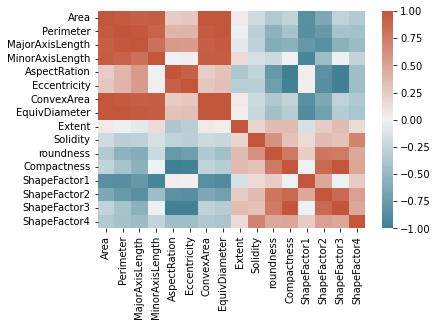

In [194]:
# Plot a heatmap to show the correlation matrix
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=cmap);

Using the correlation_matrix, find the eigenvalues and eigenvectors using the NumPy method np.linalg.eig(). Save them as eigenvalues and eigenvectors, respectively, then print them out.

In [195]:
# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors= np.linalg.eig(correlation_matrix)

In [196]:
# Print the eigenvalues and eigenvectors
# print('eigenvectors: ')
# print(eigenvectors)

# print('eigenvalues: ')
# print(eigenvalues)

# Write the eigenvalues to csv
eigenvalues = pd.DataFrame(eigenvalues, columns= ["eigenvalues"])
eigenvalues.to_csv("databank/eigenvalues.csv", index=False)

After performing PCA, we generally want to know how useful the new features are. One way to visualize this is to create a `scree plot`, which shows the proportion of information described by each principal component.

The proportion of information explained is equal to the relative size of each eigenvalue:

In [197]:
# Load the eigenvalues array from pandas df.

eigenvalues = pd.read_csv("databank/eigenvalues.csv")["eigenvalues"].values
eigenvalues

array([8.87463018e+00, 4.22895571e+00, 1.28105028e+00, 8.18252847e-01,
       4.38286865e-01, 1.83961749e-01, 1.11624116e-01, 5.20132000e-02,
       8.26026072e-03, 1.45388993e-03, 1.05418870e-03, 2.93982938e-04,
       1.48794566e-04, 1.00102669e-05, 1.78479175e-06, 2.14611337e-06])

Find the proportion of information for each eigenvector, which is equal to the eigenvalues divided by the sum of all eigenvalues

In [198]:
info_prop = eigenvalues / eigenvalues.sum()

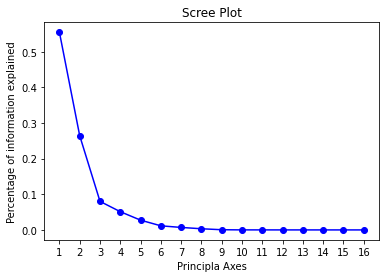

In [199]:
## Plot the principal axes vs the information proportions for each principal axis
plt.plot(np.arange(1,len(info_prop)+1),
         info_prop, 
         'bo-');
plt.title("Scree Plot")
plt.xlabel("Principla Axes")
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel("Percentage of information explained")
plt.show()

Notice that the first principal axes contain nearly 50% of the information!

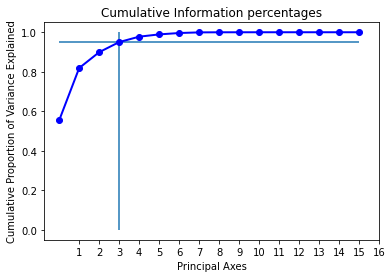

In [200]:
# Find the commulative proportion array
cum_info_prop = np.cumsum(info_prop)
## Plot the cumulative proportions array

plt.plot(cum_info_prop, 'bo-', linewidth=2)
plt.hlines(y=.95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=1)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

 Notice how four principal components describe about 95% of the information in the data.

### Implementing PCA using Scikit-Learn

The steps for implementing PCA using Scikit-Learn are:
* Standardize the data matrix. This is done by subtracting the mean and dividing by the standard deviation of each column vector. Or by the Scaler model provided by sklearn
* Perform eigendecomposition by fitting the standardized data. We can access the eigenvectors using the `components_` attribute and the proportional sizes of the eigenvalues using the `explained_variance_ratio_` attribute.

In [201]:
# Recall the data
data_matrix.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430


In [202]:
mean = data_matrix.mean(axis=0)
std = data_matrix.std(axis=0)
data_matrix_standardized = (mean - data_matrix) /std

data_matrix_standardized = pd.DataFrame(data_matrix_standardized)
data_matrix_standardized.to_csv("databank/data_matrix_standardized.csv", index=False)

Will we now use the `PCA module` from `sklearn.decomposition.PCA` to calculate the principal components (eigenvectors) for the standardized data matrix.

In [203]:
data_matrix_standardized

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.840718,1.143277,1.306550,0.631130,1.564995,2.185640,0.841420,1.063302,-0.289077,-0.367600,-1.423815,-1.839049,-0.680761,-2.402084,-1.925653,-0.838340
1,0.829157,1.013887,1.395860,0.434429,1.969712,3.685904,0.826071,1.044178,-0.697451,0.462889,-0.231046,-2.495358,-0.367953,-3.100780,-2.689603,-0.771110
2,0.807128,1.078789,1.252311,0.585713,1.514236,2.045261,0.808674,1.008047,-0.578174,-0.518398,-1.252819,-1.764778,-0.603107,-2.235009,-1.841288,-0.916721
3,0.785712,0.977179,1.278778,0.439274,1.741554,2.742110,0.773947,0.973301,-0.671235,2.241685,-0.515030,-2.081639,-0.401703,-2.514982,-2.204169,0.197978
4,0.781210,1.097344,1.380420,0.266654,2.117915,4.534862,0.784257,0.966044,-0.476003,-0.804743,-1.874924,-2.765229,-0.118264,-3.270862,-3.013352,-0.939605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.373457,0.446067,0.366656,0.363041,0.123698,-0.153337,0.378177,0.364134,0.716258,-0.684148,-0.727846,-0.032432,-0.261415,-0.055627,0.006086,-0.760785
13607,0.373320,0.456319,0.450036,0.257006,0.432963,0.165135,0.378648,0.363948,-1.022895,-0.774356,-0.818777,-0.362781,-0.110379,-0.285106,-0.328381,-0.722632
13608,0.372025,0.447816,0.450462,0.246447,0.448601,0.182933,0.376129,0.362183,0.403378,-0.591349,-0.758440,-0.370519,-0.104266,-0.289194,-0.336316,-0.390237
13609,0.371752,0.427013,0.428958,0.266732,0.380721,0.106956,0.372837,0.361812,0.903380,-0.143712,-0.581732,-0.285088,-0.141901,-0.228366,-0.248964,-0.036439


In [204]:
from sklearn.decomposition import PCA
data_matrix_standardized = pd.read_csv('databank/data_matrix_standardized.csv')

pca = PCA()
components = pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
print(components)

                       0         1         2         3         4         5   \
Area            -0.282458 -0.245882  0.061447  0.031546  0.091326 -0.366390   
Perimeter       -0.310891 -0.179303  0.018853  0.042468 -0.081820 -0.010251   
MajorAxisLength -0.325824 -0.100757  0.084692  0.006793  0.044216 -0.014909   
MinorAxisLength -0.236199 -0.343461 -0.007500  0.061300  0.004293 -0.027882   
AspectRation    -0.229298  0.330844  0.169058 -0.053646  0.024757  0.075970   
Eccentricity    -0.231526  0.319434  0.163042 -0.118389  0.060304 -0.190428   
ConvexArea      -0.283200 -0.244630  0.053649  0.030960  0.089113 -0.369216   
EquivDiameter   -0.297484 -0.222802  0.049914  0.032427  0.021953 -0.033515   
Extent           0.059808 -0.220619  0.085258 -0.948254 -0.197599  0.000511   
Solidity         0.143016 -0.103322  0.738670  0.049546  0.282194  0.325693   
roundness        0.248165 -0.214805  0.163325 -0.067482  0.648701 -0.173439   
Compactness      0.238378 -0.328914 -0.149701  0.087

In [205]:
# 3. Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.554664,0.26431,0.080066,0.051141,0.027393,0.011498,0.006977,0.003251,0.000516,0.000091,0.000066,0.000018,0.000009,6.256417e-07,1.341321e-07,1.115495e-07


### Projecting the Data onto the principal Axes
Once we have performed PCA and obtained the eigenvectors, we can use them to project the data onto the first few principal axes. We can do this by taking the dot product of the data and eigenvectors, or by using the sklearn.decomposition.PCA module as follows:




        PC1       PC2       PC3       PC4
0 -4.981378  1.824630  0.748993 -0.390797
1 -5.436593  2.932257  2.182294 -0.431944
2 -4.757913  1.826817  0.514019 -0.125849
3 -4.300383  2.003587  3.554316  0.082961
4 -6.349107  4.088055  1.179156 -0.830327


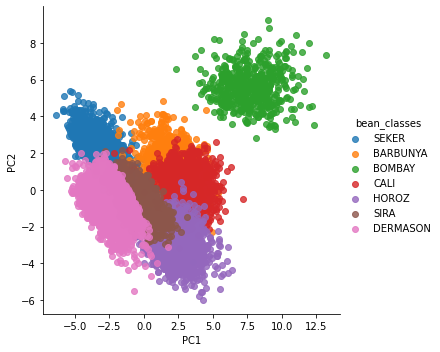

In [208]:
data_matrix_standardized = pd.read_csv('databank/data_matrix_standardized.csv')
classes = pd.read_csv('databank/classes.csv')['Class']

# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components = 4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(data_pcomp.head())



# ## 2. Plot the first two principal components colored by the bean classes

data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()


### PCA as Features

In [213]:

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


data_matrix_standardized = pd.read_csv('databank/data_matrix_standardized.csv')
classes = pd.read_csv('databank/classes.csv')
 
# We will use the classes as y
y = classes.Class.astype('category').cat.codes
 
# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5, max_iter=2000)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0, max_iter=2000)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')

/Users/user/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score for model with 4 PCA features: 0.8472840605520926
Score for model with original features: 0.9171861086375779


/Users/user/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
